In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt

%matplotlib inline

import seaborn as sns

In [1]:
data = pd.read_csv('Data/CardioGoodFitness.csv')

data.head()

NameError: name 'pd' is not defined

In [24]:
data.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


In [25]:
## Basic Description of data
data.describe(include = 'all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [26]:
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [27]:
data.info() ## Object Based data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002AB92B30248>,
      dtype=object)

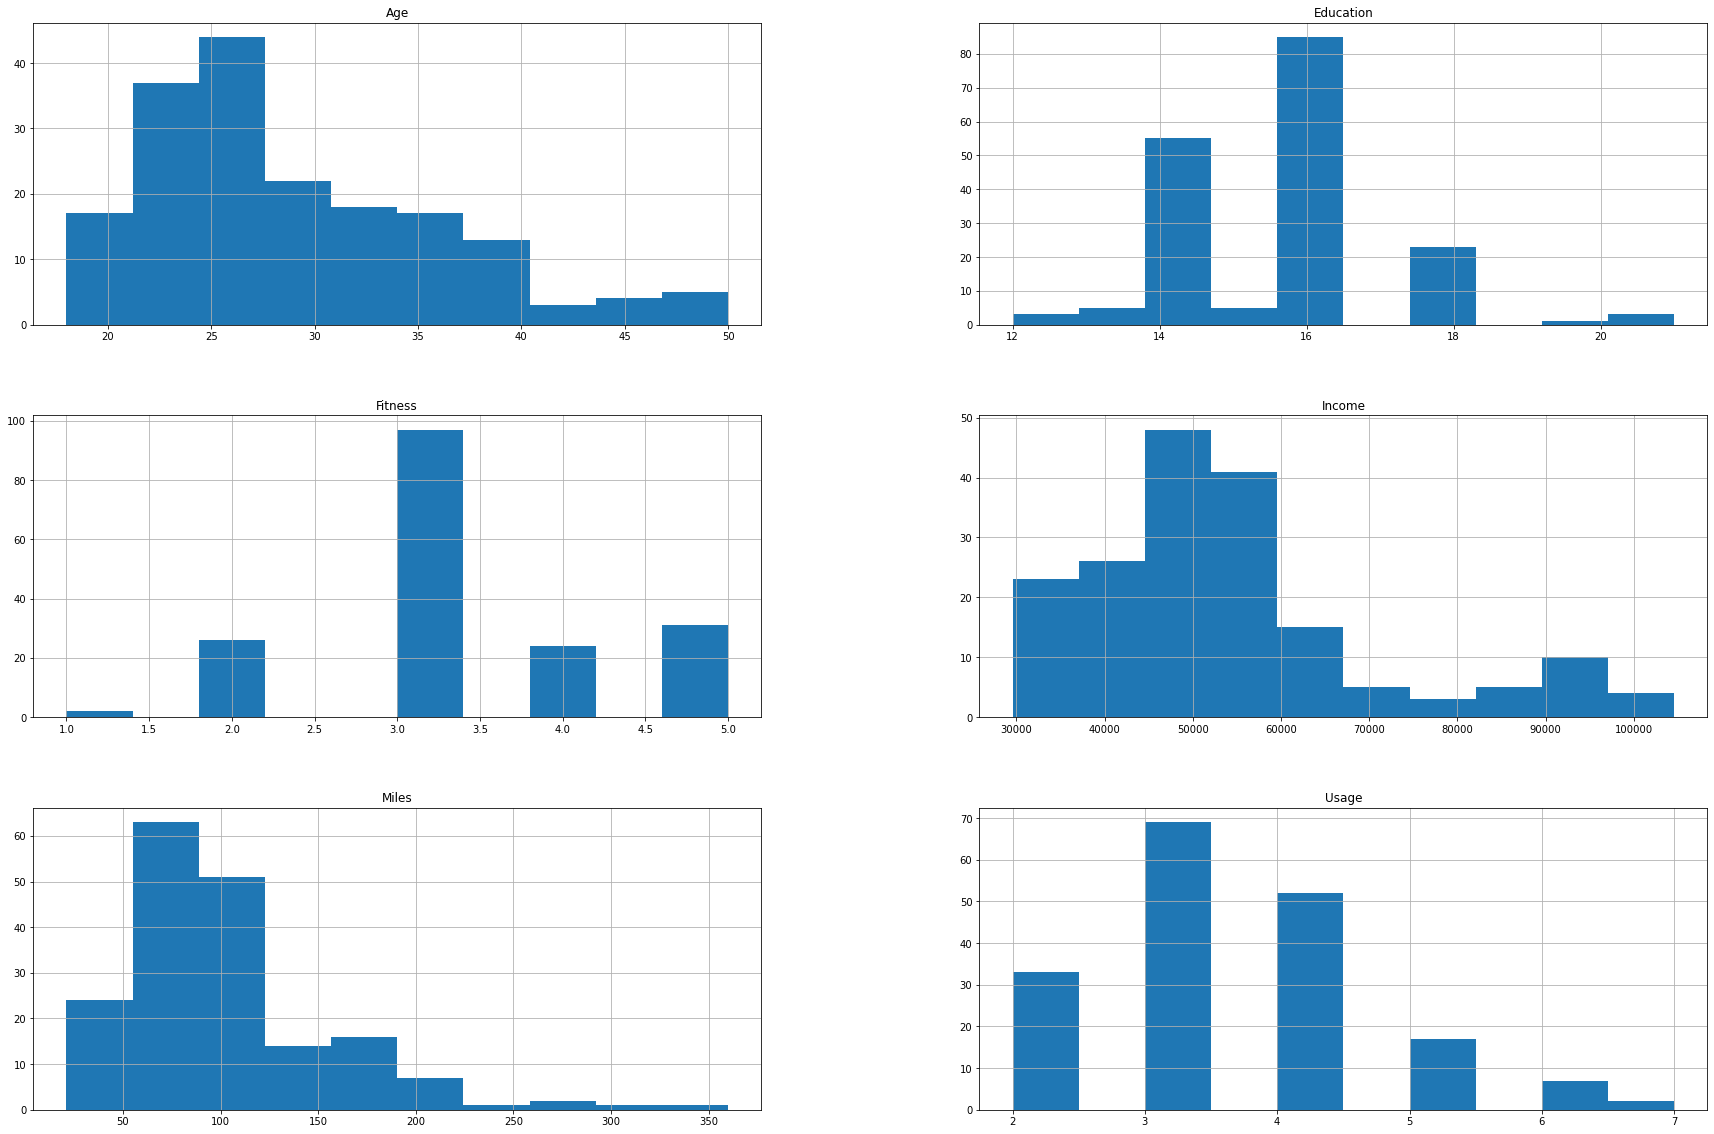

In [28]:

data.hist(figsize = (30, 20)) ## Using Global API
## 

From the histogram we realise that most of the inputs in the Data are right skewed, while Education is Left skewed.

## Box Plot

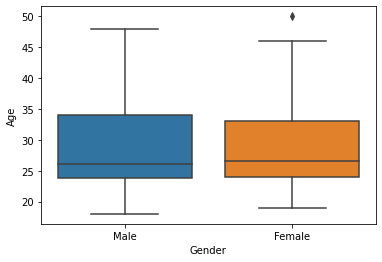

In [29]:
sns.boxplot(x="Gender", y="Age", data=data)

Since our data is right skewed we can see that the median is closer in distance to the first qualite i.e 25% and then the third qualite that is 75% is closer to the maximum value. The box plot shows the 5 point summary in one plot for understanding the data.

## Data Summarization

Box Plots and Histograms give info about numerical data but for categorical data where input is charecters or strings we use something called as Cross Tabulation within Pandas.


In [30]:
pd.crosstab(data['Product'],data['Gender'] )

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


Also for marital Status, we can do the same.


In [31]:
pd.crosstab(data['Product'], data['MaritalStatus'])

MaritalStatus,Partnered,Single
Product,,
TM195,48,32
TM498,36,24
TM798,23,17


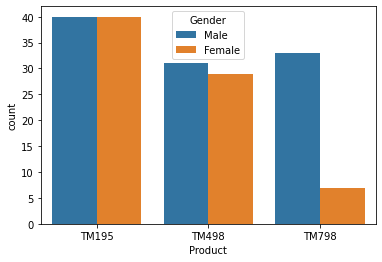

In [32]:
## Seaborn Plot to count and show the same above data
sns.countplot(x= 'Product', hue= 'Gender', data= data )

In [33]:
pd.pivot_table(data, index=['Product', 'Gender'],
                     columns=[ 'MaritalStatus'], aggfunc=len)

Age        Education          Fitness           Income  \
MaritalStatus  Partnered Single Partnered Single Partnered Single Partnered   
Product Gender                                                                
TM195   Female        27     13        27     13        27     13        27   
        Male          21     19        21     19        21     19        21   
TM498   Female        15     14        15     14        15     14        15   
        Male          21     10        21     10        21     10        21   
TM798   Female         4      3         4      3         4      3         4   
        Male          19     14        19     14        19     14        19   

                          Miles            Usage         
MaritalStatus  Single Partnered Single Partnered Single  
Product Gender                                           
TM195   Female     13        27     13        27     13  
        Male       19        21     19        21     19  
TM498   Female     14        15     14        15     14  
        Male       10        21     10        21     10  
TM798   Female      3         4      3         4      3  
        Male       14        19     14        19     14

In [34]:
pd.pivot_table(data,'Income', index=['Product', 'Gender'],
                     columns=[ 'MaritalStatus'])

MaritalStatus      Partnered        Single
Product Gender                            
TM195   Female  46153.777778  45742.384615
        Male    50028.000000  43265.842105
TM498   Female  49724.800000  48920.357143
        Male    49378.285714  47071.800000
TM798   Female  84972.250000  58516.000000
        Male    81431.368421  68216.428571

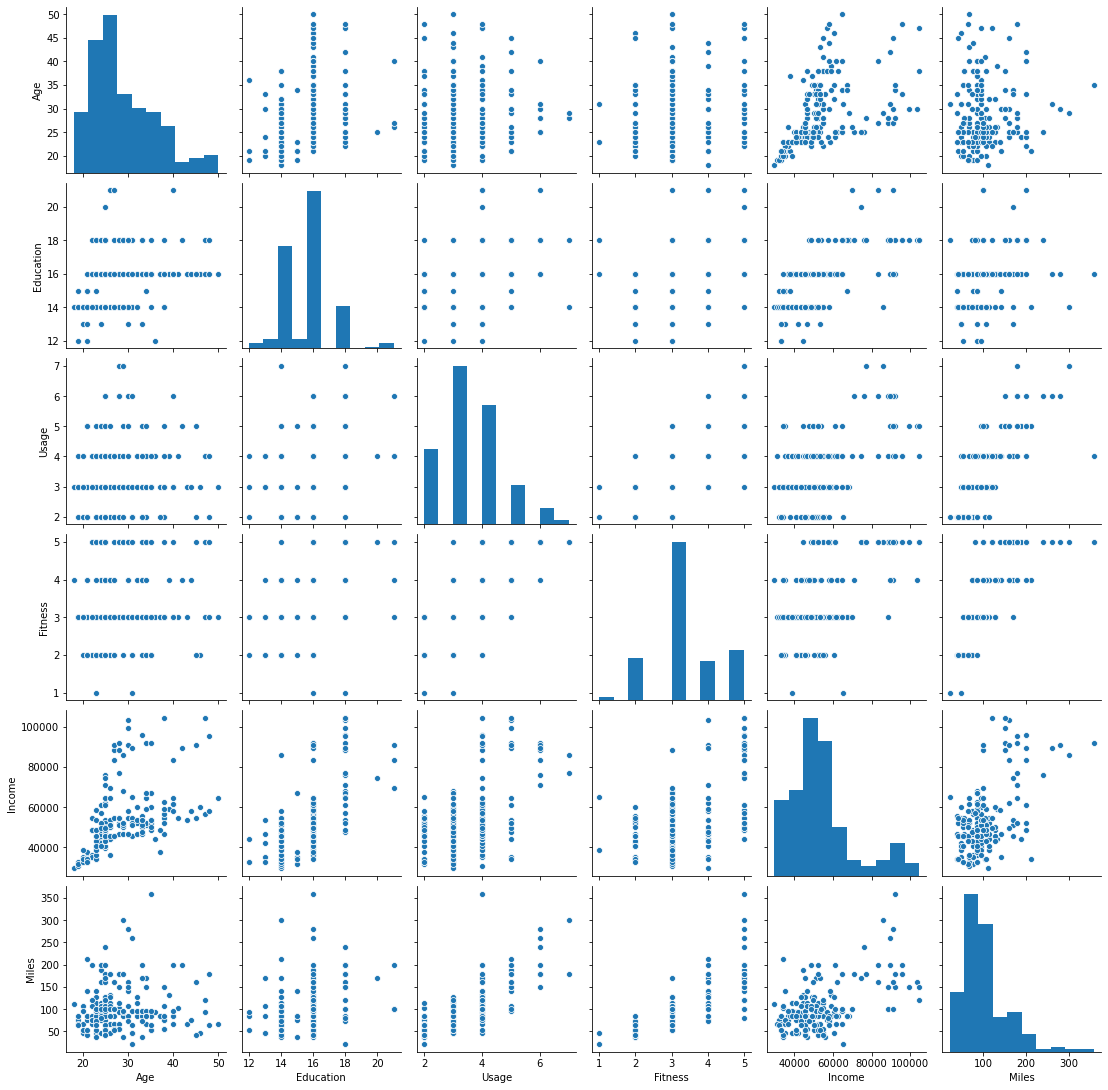

In [35]:
sns.pairplot(data)

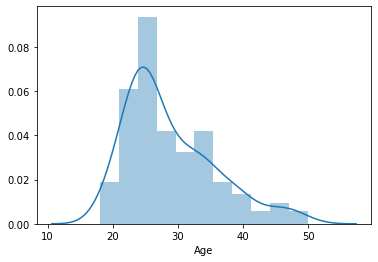

In [37]:
sns.distplot(data['Age'])

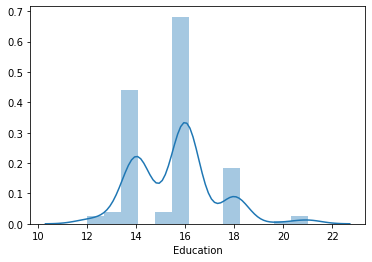

In [38]:
sns.distplot(data['Education'])

In [39]:
correlation = data.corr()

In [40]:
correlation

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


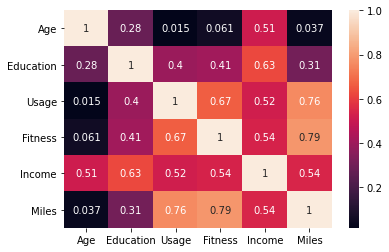

In [41]:
sns.heatmap(correlation, annot= True)

In [43]:
# Simple Linear Regression


#Load function from sklearn
from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

y = data['Miles']
x = data[['Usage','Fitness']]

# Train the model using the training sets
regr.fit(x,y)



LinearRegression()

In [44]:
regr.coef_

array([20.21486334, 27.20649954])

In [45]:
regr.intercept_

-56.742881784648645

 MilesPredicted = -56.74 + 20.21*Usage + 27.20*Fitness

In [57]:
Miles_Predicted = print("{}" .format(regr.intercept_) +  " +"  +  " {} usage" .format(regr.coef_[0]) + " +" + " {}Fitness".format(regr.coef_[1]))

-56.742881784648645 + 20.214863339075364 usage + 27.206499537469593Fitness
